#### newspaper (뉴스 전용 크롤러)
    beautifulsoup, selenium

In [2]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import newspaper
import feedparser
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [10]:
rssJ = 'https://rss.joins.com/joins_homenews_list.xml'
feeds = feedparser.parse(rssJ)
feeds

{'bozo': True,
 'entries': [{'title': '"논두렁 시계 의혹, 이인규가 흘린 증거 없다" 2심서 뒤집혔다',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://rss.joins.com/joins_homenews_list.xml',
    'value': '"논두렁 시계 의혹, 이인규가 흘린 증거 없다" 2심서 뒤집혔다'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'http://news.joins.com/article/24132134?cloc=rss-news-home_list'}],
   'link': 'http://news.joins.com/article/24132134?cloc=rss-news-home_list',
   'summary': '이 전 부장은 2018년 9월 "시계 수수 의혹을 언론에 흘리지 않았고 국정원이 흘리는 데 개입하지도 않았다"며 소송을 냈다. 이어 "피고들은 시계 수수 의혹과 관련해 여러 차례 수사와 조사가 진행됐으나 여전히 진상이 명확히 규명되지 않은 상태임을 인정하면서 원고가 시계 수수 의혹 보도에 관여했는지 여부를 알 수 없',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://rss.joins.com/joins_homenews_list.xml',
    'value': '이 전 부장은 2018년 9월 "시계 수수 의혹을 언론에 흘리지 않았고 국정원이 흘리는 데 개입하지도 않았다"며 소송을 냈다. 이어 "피고들은 시계 수수 의혹과 관련해 여러 차례 수사와 조사가 진행됐으나 여전히 진상이 명확히 규명되지 않은 상태임을 인정하면서 원고가 시계 수수 의혹 보도에 관여했는지 여부를 알 수 없'},
   'authors

In [11]:
title = [ n['title'] for n in feeds['entries'] ]
title

['"논두렁 시계 의혹, 이인규가 흘린 증거 없다" 2심서 뒤집혔다',
 '"韓 백신 증명 인정 안한다"던 홍콩, 12분 만에 맘바뀐 이유',
 '진중권 "떡볶이 먹고 시시덕···이재명 정치생명 끊는 황교익"',
 '‘세금 먹는 하마’ 평창 알펜시아 최종 계약 성사 드디어 팔렸다',
 '마크롱처럼 고향서 출마선언한 김동연 “대선 완주하겠다"',
 '"오빠폰에 몰카 있어요" 민주당 의원실 비서, 여동생이 신고',
 '성 김 21일 방한…北, 김여정의 비난 담화? 김정은의 무력도발?',
 '2167대 매질에 아들 사망…비정한 모친, 살인죄는 피했다',
 '변이 유행국가 36개 명단 발표…가나·일본·페루 격리면제 제외',
 '경선준비위 서병수 사퇴…윤석열 측 “25일 비전발표회 참석”',
 '"아사리판"예견했던 김종인 재등판론…李-尹갈등 중재 나설까',
 '쿠팡화재→협약식→소방관 고립→먹방…이재명 6월17일 그날',
 '윤석열 측 “김건희 허위 경력 의혹 보도, 명백한 오보”',
 '미성년자 11명 성폭행…‘악질 성범죄자’ 김근식, 내년 출소',
 '부동산 시장 진정세 접어든 中, 어떤 규제했길래',
 '[단독]백운규 공소장…檢, ‘문재인’ 3번,‘대통령’ 40번 적었다',
 '박근혜 오늘 퇴원, 구치소 복귀..."건강상태 상당히 심각"',
 '중립기어 풀고 이재명 때렸다···경선 막판 흔드는 친문 부엉이',
 '"김의겸 힘이 컸다"…\'언론재갈법\' 함께 자축한 기자출신 이낙연',
 "여당 또 나홀로 독주…'집토끼' 잡느라 4·7 참패 교훈 잊었다",
 '농협 이어 우리은행도 "전세대출 중단"…서민들 대출 날벼락',
 '이단인가 ‘루터’인가…기독대학서 파면된 교수의 1인 시위',
 '추미애 측 "테러에 가까운 인격 살인적 언행…사법조치 취할 것"',
 '美전문가 "투명 가림막, 오히려 코로나 감염 악화시킬수도"',
 '공소시효 끝난줄 알고 인터뷰…22년 전 살인, 딱 걸린 그놈',
 '검찰, 이용구에 음주폭행 당한 택시기사 소환…증거인멸 조사',
 '출소 1달 만

In [12]:
link = [ n['link'] for n in feeds['entries'] ]
link

['http://news.joins.com/article/24132134?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132160?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132231?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132242?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132305?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132329?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132375?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132381?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132383?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132395?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132403?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132423?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132425?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132447?cloc=rss-news-home_list',
 'http://news.joins.com/article/24132448?cloc=rss-news-home_li

In [14]:
jlist = []
for ln in link:
    article = newspaper.Article(ln, language='ko')
    article.download()
    article.parse() # html 파싱
    print(article.text)
    jlist.append(article.text)
    print('=============================')

이인규 전 대검찰청 중앙수사부장이 과거 고(故) 노무현 전 대통령의 ‘논두렁 시계’ 의혹을 언론에 흘렸다는 보도는 사실과 다르다며 낸 정정보도·손해배상 청구 소송 항소심에서 일부 승소했다.

20일 법조계에 따르면 서울고법 민사8부(부장 장석조·김길량·김용민)는 이 전 부장이 노컷뉴스 운영사 CBSi와 A논설위원, B기자를 상대로 낸 정정보도 및 손해배상 청구 소송을 원고 패소로 판결한 1심을 깨고 원고 일부 승소로 판결했다.

재판부는 “노컷뉴스에 정정보도를 게재하고 향후 기사 데이터베이스에 보관해 검색되도록 하라”며 “CBSi와 A위원이 공동으로 3000만원, CBSi와 B기자가 공동으로 1000만원을 원고에게 지급하라”고 했다.

노컷뉴스는 지난 2018년 6월 ‘이인규 미국 주거지 확인됐다, 소환 불가피’라는 기사와 ‘이인규는 돌아와 진실을 밝혀야 한다’는 논평을 다루면서 “언론에 흘린 것은 검찰이었고, 이는 당시 국정원의 요청에 따른 것으로 확인됐다. 이인규씨는 노 전 대통령에게 타격을 주기 위한 국정원의 기획이었다며 사실을 시인했다”고 썼다.

이 전 부장은 2018년 9월 “시계 수수 의혹을 언론에 흘리지 않았고 국정원이 흘리는 데 개입하지도 않았다”며 소송을 냈다.

1심은 “원고가 2009년 4월 21일 국정원 간부를 만났고, 국정원 간부는 ‘시계 수수 의혹을 공개해 (노 전 대통령에게) 도덕적 타격을 주는 것이 좋다’는 취지로 말했다”며 “원고를 사건 관여자로 표현한 보도가 허위라고 보기 어렵다”고 판단했다.

2심은 “보도한 사실의 존재를 수긍할 만한 자료를 제시했다고 보기 어려워 허위사실이라고 봐야 한다”며 판단을 뒤집었다. 이어 “피고들은 시계 수수 의혹과 관련해 여러 차례 수사와 조사가 진행됐으나 여전히 진상이 명확히 규명되지 않은 상태임을 인정하면서 원고가 시계 수수 의혹 보도에 관여했는지 여부를 알 수 없다고 주장한다”고 지적했다.

그러면서 “원고가 국정원 간부로부터 시계 수수 의혹을 언론에 흘리는 방식으로 활용하면 좋겠다는 요청

윤석열 전 검찰총장이 이달 25일로 예정된 국민의힘 대선 경선준비위원회에서 주관하는 비전발표회에 참석하기로 결정했다.

윤 전 총장 측은 그동안 경준위가 주관한 당 행사가 원칙에 어긋난다며 불참하겠다는 의사를 피력해왔다. 하지만 서병수 경선준비위원장이 자진 사퇴하며 보이콧할 명분이 줄어든 점도 참석을 결정하는 데 영향을 끼쳤다는 분석이다.

윤석열캠프 종합상황실 총괄실장을맡고 있는 장제원 국민의힘 의원은 20일 “경준위에서 주관하는 발표회는 전례도 없고 원칙에도 부합하지 않는다”면서도 “당의 화합을 통해 정권교체를 이뤄내라는 국민의 목소리를 받들어 발표회에 참석하기로 했다”고 밝혔다.

장 의원은 “향후 선거관리위원회의 모든 결정은 원칙과 상식에 기반해 이뤄지길 바란다”고 덧붙였다.

윤 전 총장이 경준위 주관 행사에 참석을 결정하면서 그동안 이준석 대표 등 지도부와 후보 캠프 간의 갈등이 봉합될지 주목된다.

비전발표회는 당초 정책토론회로 예정됐으나 경준위의 ‘월권 논란’이 불거지면서 비전발표회 형식으로 변경됐다.

지난 9일께 서병수 경선준비위원장이 이달 18일과 25일 대선 후보들을 모아 경제와 사회분야에 대한 토론회를 열겠다고 밝히면서 최근까지 당내 갈등이 커지는 상황이었다.

이에 여론조사 지지율에서 1위를 달리고 있는 윤 전 총장 측은 토론회가 공식화되자 즉각 발끈하고 나섰다. 윤 후보 측은 “과거에 경준위가 그런 토론회를 개최한 전례가 없고, 후보 등록도 안 한 상태에서 10명 넘는 주자가 한자리에 모여 토론회를 하는 것은 형식상으로도 맞지 않다”고 지적했다.
김종인 전 국민의힘 비상대책위원장은 지난 4월 퇴임 직후 한 언론 인터뷰에서 국민의힘을 “아사리판”이라고 표현했다. 당시 전당대회를 앞두고 '누구는 되고, 누구는 안된다'는 식의 싸움이 거세게 붙었는데, 김 전 위원장은 “이런 식으로 끌고 가서는 국민의힘으로 대선을 해볼 도리가 없다. 더 이상 애정이 없다”며 이렇게 말했다.

그런데 4개월이 지난 최근 국민의힘에선 김 전 위원장의 발언과 비

검찰이 ‘월성원전 1호기 경제성평가 조작 의혹’과 관련해 백운규 전 산업통상자원부 장관 등의 공소장에 ‘문재인’ 3번, ‘대통령’이란 단어를 40번 넘게 쓴 것으로 파악됐다. 지난해 10월 감사원 감사 결과 보고서에 ‘대통령’이란 표현이 2번밖에 등장하지 않은 것과 비교해 월성 1호기 조기폐쇄에 문 대통령의 책임론을 강조한 것이란 평가가 나온다.

문 대통령이 청와대 내부망에 ‘영구 가동 중단은 언제 결정할 계획인가요’라는 댓글을 단지 이틀 만에 산업부가 기존 ‘한시가동’ 방침을 바꿔 ‘즉시 가동중단’으로 수정한 보고서를 작성했고 당일 경제수석-정책실장-비서실장을 거쳐 문 대통령의 최종 결재를 받은 정황까지 적시했기 때문이다.

20일 중앙일보 취재를 종합하면 대전지검 형사5부는 지난 6월 30일 백 전 장관과 채희봉 청와대 산업정책비서관, 정재훈 한국수력원자력 사장을 불구속기소 하면서 청와대 개입 부분을 소상히 기록했다. 전체 101쪽 분량의 3인의 공소장 안에 ‘문재인’이라는 고유명사를 3번, ‘대통령’이란 단어를 40여 차례 사용했다고 한다. 이 밖에 ‘청와대’ ‘BH’ ‘실장’ ‘수석’ ‘보좌관’ ‘비서관’ ‘행정관’ 등의 단어도 다수 눈에 띈다. 검찰은 “청와대가 위계와 위력으로 산업부 등을 압박해 원전 경제성 조작, 조기 폐쇄로 이어졌다”는 취지로 판단했다고 한다.

文 “가동중단 언제?” 댓글 이틀 만…산업부 ‘한시가동’→‘즉시중단’

공소장에 따르면 월성 1호기 조기폐쇄 결정 과정의 출발점도 문 대통령이었다. 2018년 4월 2일 당시 문미옥 청와대 과학기술보좌관은 내부 보고시스템에 “월성 1호기 외벽에 철근이 노출되어 정비 기간을 연장한다”는 취지의 보고서를 올렸다. 그러자 당일 문 대통령이 ‘월성 1호기의 영구 가동 중단은 언제 결정할 계획인가요’라는 댓글을 달았다.

그 직후 김모 청와대 산업정책비서관실 행정관은 채희봉 산업정책비서관(현 한국가스공사 사장)에게 문 대통령의 댓글 내용을 전달했고, 채 비서관은 “대통령께 빨리 보고해야 하니까 

금융당국이 가계대출을 본격적으로 죄기 시작하면서 시중은행에서 신규 대출을 전면 중단하는 등 초유의 조치가 이어지고 있다. NH농협은행이 신규 주택담보대출과 전세대출 접수를 전면 중단하기로 한 데 이어 우리은행도 전세대출 한시 중단 방침을 밝혔다. 다른 은행들 역시 신용대출 한도 축소 등에 속속 나설 전망이다. 여기에 금융당국이 대출 수요가 제2 금융권으로 옮겨가는 '풍선효과' 차단에도 나서면서 대출 한파는 전방위로 확산할 전망이다.

NH농협 이어 우리은행 "신규 전세 대출 중단"

20일 우리은행은 9월 말까지 전세 대출 취급을 중단한다고 밝혔다. 당국의 가계부채 축소 권고에 따라 분기별 대출 한도를 정해뒀는데, 3분기(7~9월) 한도가 이미 전부 소진돼 더는 대출을 내줄 수 없다는 게 은행 측 설명이다. 다만 4분기가 시작되는 10월 1일부터는 다시 전세 대출 신규 신청을 받는다.

앞서 19일 NH농협은행은 전세대출뿐만 아니라 주택담보대출과 아파트 단체 대출 등 신용대출을 제외한 대부분의 가계 대출에 대해 신규·증액 재약정·대환대출 취급을 전면 중단한다고 밝혔다. 농협은행은 올 상반기 가계대출 증가율이 금융당국의 연간 권고치 5%를 넘기면서 대책을 마련하라는 압박을 받아왔다. 일단 은행 측이 밝힌 대출 중단 기간은 오는 24일부터 11월 30일까지지만, 그 이후에도 재개한다는 보장은 없다.

SC제일은행도 지난 18일부터 부동산담보대출 상품인 '퍼스트홈론'의 운영을 일부 중단했다.

금융당국 "신용대출 한도 축소" 압박

감독당국은 은행들을 향해 신용대출 한도도 축소하라고 압박하고 있다. 금융감독원은 지난 13일 시중은행 여신 담당 임원들에게 개인 신용대출 한도를 대출자의 연 소득 수준으로 낮춰달라고 요구했다. 연 소득의 120%~200%였던 한도를 100% 이내로 하향 조정하라고 사실상 '창구 지도'를 한 것이다.

주택담보 대출자가 약정을 위반할 경우 대출을 즉시 회수하라는 지침도 전달했다. 기존 주택을 처분하기로 한 약정 등을 지키지 않는 경우에도 

성범죄 전과가 있는 40대 남성이 출소 한 달 만에 1만5000번에 걸쳐 불특정 여성의 신체를 불법 촬영해 경찰에 붙잡혔다. 그의 발목에는 전자발찌가 채워져 있었다.

경기 평택경찰서는 성폭력처벌법상 카메라 등 이용 촬영 혐의로 A씨(48)를 구속 수사 중이라고 20일 밝혔다.

경찰은 ‘어떤 남자가 여자 뒤를 따라다니며 사진을 찍는다’는 112 신고를 받고 출동한 경찰에 주거지에서 그를 체포했다.

A씨는 지난 5월 8일부터 이달 12일까지 평택 일대에서 길거리를 다니는 여성들의 다리 등 신체 부위를 휴대전화로 1만5000여 차례 촬영하고 이 사진을 소지한 혐의를 받는다. 그는 범행을 들키지 않기 위해 무음 촬영이 가능한 스마트폰 애플리케이션을 사용한 것으로 조사됐다.

A씨는 과거 6차례 성범죄로 전자발찌 부착 명령을 받은 신상등록 대상자다. 전자발찌 부착 상태에서 절도를 저질러 실형을 선고받고 복역하다 지난 4월 출소한 뒤 한 달 만에 범행을 저질렀다.

경찰은 A씨의 휴대전화 디지털 포렌식 결과를 토대로 여죄를 조사한다는 방침이다.
여장을 하고 접근한 남성 유튜버를 여고생으로 여기고 성매수를 시도한 60대 남성이 경찰 조사를 받는다. A씨는 지난 19대 대선 때 문재인 캠프의 대선 특보를 지냈다는 이력이 알려져 논란이 증폭됐다.

서울경찰청 여성청소년수사대는 20일 “해당 남성에 대한 다수의 신고를 접수받고 내사를 진행하고 있다”고 밝혔다.

A씨는 성매매가 이뤄지는 익명 채팅 앱을 통해 유튜브 채널 ‘카광’ 운영자 이모씨와 연결됐다. 이모씨는 '여고생을 재워준다고 하기에 찾아가 보았다'라는 주제로 영상을 만들기 위해 여장을 하고 A씨와 만났다.

만남 전에 A씨는 채팅을 통해 자신을 29세 헬퍼라고 속였다. 헬퍼는 가출 청소년에게 숙식을 제공하는 사람을 뜻하는 은어다. 숙식을 제공하고 성적 착취를 하는 경우도 많다.

영상에서 A씨는 이모씨를 차량을 이용해 집으로 데려가면서 “초등학생은 20만~30만원만 주면 좋아하지” “중학생도 마찬가지고, 고등학생

식품의약품안전처(이하 식약처)는 20일 엠피코퍼레이션이 러시아산 코비박 코로나19 백신에 대한 허가신청 전 사전 검토를 신청해 비임상 자료 검토에 착수했다고 밝혔다.

코비박 백신은 우리 정부가 도입계획을 발표한 백신은 아니지만 엠피코퍼레이션이 국내 위탁생산을 주도하고 있다. 코비박은 러시아 과학아카데미 산하 ‘추마코프면역약품연구개발센터’(이하 추마코프 센터)가 개발했으며, 러시아의 세 번째 코로나19 백신이다.

코비박 백신은 바이러스를 사멸시켜 항원으로 체내에 주입해 면역 반응을 유도하는 불활화 백신이다. 러시아에서 올해 2월 긴급사용승인됐으나 러시아 이외 국가에서는 아직 허가되지 않았다.

엠피코퍼레이션은 올해 2월 추마코프 센터와 이 백신의 국내 위탁생산과 아세안 국가 총판에 관한 업무협약을 맺었다.
경남 창원에서 확인되지 않은 비행물체가 굉음을 내며 시내 상공을 가로지르면서 ‘미확인 비행물체(UFO)’ 소동이 빚어졌다. 미군 소속 F16 전투기였다.

20일 JTBC에 따르면 전날 오후 1시께 창원 시내 상공에는 검은 비행물체 3대가 나타났다. 시민들이 찍은 사진을 보면 이들 비행 물체는 굉음을 내며 아파트 바로 위에서 저공 비행을 했다.

시민들이 놀라 시청에 직접 문의했지만 시 측이 “비행 사실도 전투기 정체도 모른다”고 답변하면서 시민들의 혼란도 가중됐다.

창원 지역 온라인 커뮤니티를 중심으로 굉음을 듣고 비행물체의 정체를 묻는 글들이 여럿 올라왔다. 창원 시민들은 “전쟁 난 줄 알았다”, “너무 무서웠다”, “큰 소리에 놀라 낮잠 자다 깼다”고 반응했다. 일각에선 이들 비행기가 홍범도 장군 유해를 모신 특별수송기를 호위한 전투기라는 글도 올라왔다.

JTBC 확인 결과 이들 비행 물체는 경기도 오산에 위치한 미군 부대 소속 F16 전투기였다.

미군 측은 저공비행으로 시민들에게 불안과 불편을 드렸다며 사과 했다.
탈레반이 점령한 아프가니스탄에서 탈출이 쉽지 않자 엄마가 아기라도 살리기 위해 높고 날카로운 철조망 너머로 아기를 던지는 모습이 포

In [16]:
len(jlist)

46

In [18]:
j = ' '.join(jlist) #리스트를 하나의 문자열로

#### 명사 추출 / 글자 2개 이상 추출 / wordcloud

In [20]:
han = Okt()

In [21]:
print(han.nouns(j))

['이인규', '전', '대검찰청', '중앙', '사부', '과거', '고', '노무현', '전', '대통령', '논', '두렁', '시계', '의혹', '언론', '보도', '사실', '정정', '보도', '손해배상', '청구', '소송', '항소심', '일부', '승소', '법조', '서울', '고법', '민사', '부', '부장', '장석', '김길량', '김용민', '이', '전', '부장', '노컷뉴스', '운영', '사', '논설', '위원', '기자', '상대로', '정정', '보도', '및', '손해배상', '청구', '소송', '원고', '패소', '판결', '심', '원고', '일부', '승소', '판결', '재판', '노컷뉴스', '정정', '보도', '게재', '향후', '기사', '데이터베이스', '보관', '검색', '하라', '며', '위원', '공동', '기자', '공동', '원고', '지급', '고', '노컷뉴스', '지난', '이인규', '미국', '주거지', '확인', '소환', '불가피', '기사', '이인규', '진실', '논평', '언론', '것', '검찰', '당시', '국정원', '요청', '것', '확인', '이인규', '노', '전', '대통령', '타격', '주기', '위', '국정원', '기획', '사실', '시인', '고', '이', '전', '부장', '시계', '수수', '의혹', '언론', '국정원', '데', '개입', '며', '소송', '원고', '국정원', '간부', '국정원', '간부', '시계', '수수', '의혹', '공개', '노', '전', '대통령', '도덕', '타격', '것', '취지', '말', '며', '원고', '사건', '관여', '표현', '보도', '허위', '보기', '고', '판단', '보도', '사실', '존재', '수긍', '만', '자료', '제시', '보기', '허위', '사실', '며', '판단', '피고', '시계', '수수', '의혹', '관련', '여러'

In [36]:
jj = [i for i in han.nouns(j) if len(i) >= 2]
txtj = Text(jj)
txtj.vocab()

FreqDist({'지난': 61, '대표': 60, '의원': 59, '언론': 43, '국민': 39, '후보': 39, '대출': 39, '민주당': 36, '라며': 36, '대한': 34, ...})

In [30]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
from wordcloud import WordCloud
from PIL import Image

In [31]:
hanMask = np.array(Image.open('image/han.jpg'))

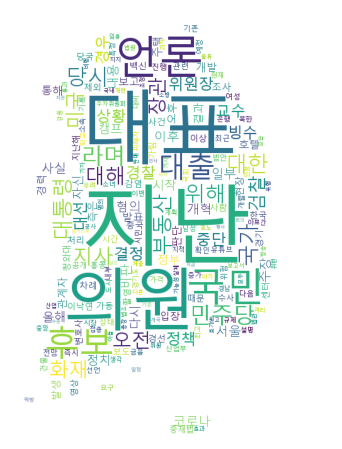

In [37]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc = WordCloud(width=1000, height=600, background_color='white',
              font_path=font_path, mask=hanMask)
gen = wc.generate_from_frequencies( txtj.vocab() )
plt.figure(figsize = (10, 8))
plt.imshow(gen)
plt.axis('off')
plt.show()

#### pos tag에서 형용사를 추출한 후 wordcloud

In [38]:
print(han.pos(j))

[('이인규', 'Noun'), ('전', 'Noun'), ('대검찰청', 'Noun'), ('중앙', 'Noun'), ('수', 'Modifier'), ('사부', 'Noun'), ('장이', 'Suffix'), ('과거', 'Noun'), ('고', 'Noun'), ('(', 'Punctuation'), ('故', 'Foreign'), (')', 'Punctuation'), ('노무현', 'Noun'), ('전', 'Noun'), ('대통령', 'Noun'), ('의', 'Josa'), ('‘', 'Foreign'), ('논', 'Noun'), ('두렁', 'Noun'), ('시계', 'Noun'), ('’', 'Punctuation'), ('의혹', 'Noun'), ('을', 'Josa'), ('언론', 'Noun'), ('에', 'Josa'), ('흘렸다는', 'Verb'), ('보도', 'Noun'), ('는', 'Josa'), ('사실', 'Noun'), ('과', 'Josa'), ('다르다며', 'Adjective'), ('낸', 'Verb'), ('정정', 'Noun'), ('보도', 'Noun'), ('·', 'Punctuation'), ('손해배상', 'Noun'), ('청구', 'Noun'), ('소송', 'Noun'), ('항소심', 'Noun'), ('에서', 'Josa'), ('일부', 'Noun'), ('승소', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('\n\n', 'Foreign'), ('20일', 'Number'), ('법조', 'Noun'), ('계', 'Suffix'), ('에', 'Josa'), ('따르면', 'Verb'), ('서울', 'Noun'), ('고법', 'Noun'), ('민사', 'Noun'), ('8', 'Number'), ('부', 'Noun'), ('(', 'Punctuation'), ('부장', 'Noun'), ('장석', 'Noun'), ('조', 'Suf

In [40]:
j2 = [i[0] for i in han.pos(j) if i[1] == 'Adjective']
txtj2 = Text(j2)
txtj2.vocab()

FreqDist({'있다': 81, '있는': 26, '없다': 18, '같은': 15, '아니라': 12, '미': 10, '어떤': 9, '있다는': 9, '있지만': 8, '그러면서': 7, ...})

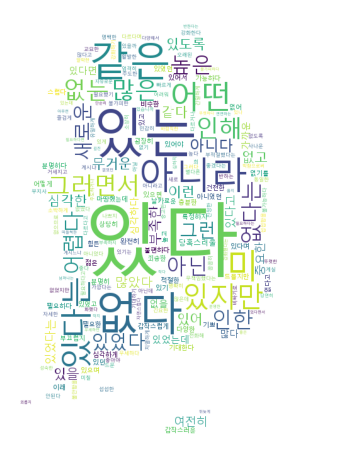

In [41]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc = WordCloud(width=1000, height=600, background_color='white',
              font_path=font_path, mask=hanMask)
gen = wc.generate_from_frequencies( txtj2.vocab() )
plt.figure(figsize = (10, 8))
plt.imshow(gen)
plt.axis('off')
plt.show()